In [4]:
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
train_df = pd.read_csv(os.path.join('.','data','features_bands.csv'))
test_df = pd.read_csv(os.path.join('.','data','features_test.csv'))
test_df.head()

test_1 = pd.read_csv(os.path.join('.','data','features_bands.csv')).drop(['Unnamed: 0','id','is_iceberg','not_iceberg'],axis=1)
test_2 = pd.read_csv(os.path.join('.','data','features_imf_1.csv')).drop(['Unnamed: 0','id','is_iceberg','not_iceberg','inc_angle'],axis=1)
test_3 = pd.read_csv(os.path.join('.','data','features_imf_2.csv')).drop(['Unnamed: 0','id','is_iceberg','not_iceberg','inc_angle'],axis=1)
test_4 = pd.read_csv(os.path.join('.','data','features_res_1.csv')).drop(['Unnamed: 0','id','is_iceberg','not_iceberg','inc_angle'],axis=1)
test_5 = pd.read_csv(os.path.join('.','data','features_res_2.csv')).drop(['Unnamed: 0','id','is_iceberg','not_iceberg','inc_angle'],axis=1)



FileNotFoundError: File b'./data/features_test.csv' does not exist

(1604, 100)

In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
X_df = train_df.drop(['Unnamed: 0','id','is_iceberg','not_iceberg'], axis=1)
Y_df = train_df['is_iceberg']

X_test = test_df.drop(['Unnamed: 0','id'], axis=1)
from sklearn.preprocessing import StandardScaler
#X = X_df.as_matrix()
#All
#X = np.concatenate([test_1.as_matrix(),test_2.as_matrix(),test_3.as_matrix(),test_4.as_matrix(),test_5.as_matrix()],axis=1)
#Imfs only
#X = np.concatenate([test_2.as_matrix(),test_3.as_matrix()],axis=1)
#Only res
#X = np.concatenate([test_4.as_matrix(),test_5.as_matrix()],axis=1)
#Best features
X = np.concatenate([
    test_1.as_matrix(),
    test_2.as_matrix(),
    test_3.as_matrix(),
    test_4.as_matrix(),
    test_5.as_matrix()],
    axis=1)


scaler = StandardScaler().fit(X)
#X = scaler.transform(X)
#X_test = scaler.transform(X_test)

X_train, X_valid, Y_train, Y_valid = train_test_split(X , Y_df, test_size=0.2, random_state=42, stratify=Y_df)





NameError: name 'train_df' is not defined

In [22]:
clf = svm.SVC(kernel='linear',probability=True)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_valid)
from sklearn.metrics import accuracy_score

accuracy_score(Y_pred,Y_valid)

0.88473520249221183

In [7]:
def plot_coefficients(classifier, feature_names, top_features=10):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.title('Most important features, linear kernel')
 plt.show()

from sklearn.svm import LinearSVC
svc = LinearSVC().fit(X, Y_df)
plot_coefficients(svc, X_df.columns.values.tolist())
Y_pred = svc.predict(X)
from sklearn.metrics import accuracy_score

accuracy_score(Y_pred,Y_df)

IndexError: index 39 is out of bounds for axis 1 with size 21

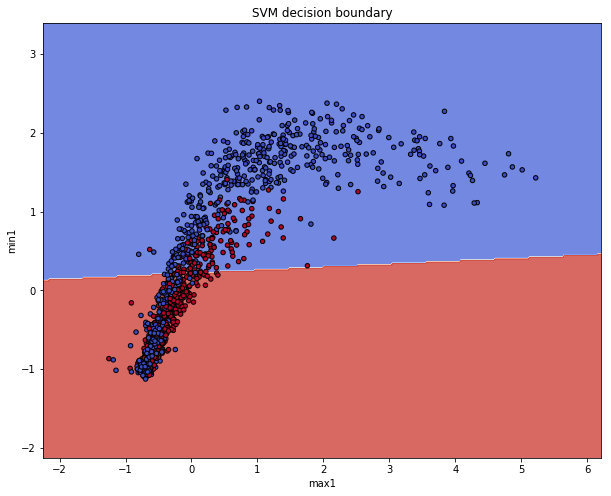

0.645261845387


In [182]:
X_2d = X_df[['std2','skewness2']].as_matrix()
from sklearn.preprocessing import StandardScaler
X_2d = StandardScaler().fit_transform(X_2d)
svc = svm.SVC(kernel='linear').fit(X_2d, y=Y_df)

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
plt.figure(figsize=(10,8))
ax = plt.gca()
X0, X1 = X_2d[:, 0], X_2d[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, svc, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y_df, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
plt.xlabel('max1')
plt.ylabel('min1')
plt.title('SVM decision boundary')

plt.show()

Y_pred = svc.predict(X_2d)
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_pred,Y_df))
#print(svc.coef_)

0.84735202492211836

In [ ]:
Y_pred = clf.predict_proba(X_test)
print(Y_pred)

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_pred,Y_valid)

ValueError: Found input variables with inconsistent numbers of samples: [8424, 1604]

In [42]:
submit_df = pd.DataFrame({'id': test_df["id"], 'is_iceberg': Y_pred[:,1]})
submit_df.head()
submit_df.to_csv("./submission.csv", index=False)


In [43]:
submit_df.head()

,id,is_iceberg
0,5941774d,0.075102
1,4023181e,0.086224
2,b20200e4,0.029365
3,e7f018bb,0.945732
4,4371c8c3,0.037757
